In [15]:
import pandas as pd
import json 
from collections import ChainMap
import re
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
f = open('movies.json', encoding="utf8")

In [3]:
data = json.load(f)

In [4]:
df = pd.json_normalize(data)

In [5]:
def list2dict(a):
    re = {}
    if a == None:
        return None
    else:
        for item in a:
            re.update(item)
        return re

In [7]:
df['box_office'] = df['box_office'].apply(lambda x: list2dict(x))

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [8]:
df['Budget'] = df['box_office'].apply(lambda x: int(''.join(filter(str.isdigit,x.get('Budget')))) if x!= None and x.get('Budget') != None else None)

In [9]:
df['gross'] = df['box_office'].apply(lambda x: int(''.join(filter(str.isdigit,x.get('Gross worldwide')))) if x!= None and x.get('Gross worldwide') != None else None)

In [10]:
df.genre

0                             [Drama]
1                      [Crime, Drama]
2              [Action, Crime, Drama]
3                      [Crime, Drama]
4                      [Crime, Drama]
                    ...              
245    [Animation, Action, Adventure]
246    [Animation, Adventure, Comedy]
247                           [Drama]
248       [Biography, Drama, History]
249       [Action, Adventure, Comedy]
Name: genre, Length: 250, dtype: object

In [11]:
df['actor'].apply(lambda x: len(x))

0      3
1      3
2      3
3      3
4      3
      ..
245    3
246    3
247    3
248    3
249    3
Name: actor, Length: 250, dtype: int64

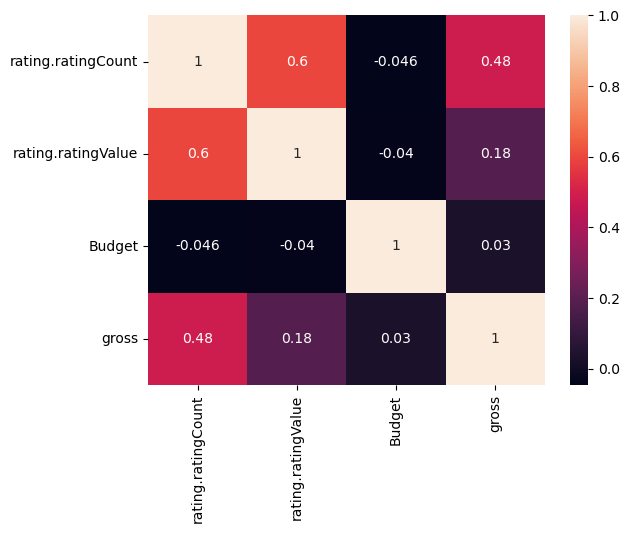

In [16]:
corr_matrix = df[['rating.ratingCount','rating.ratingValue','Budget','gross']].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()